#Python Bootcamp - get started with pandas

###import

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 
from ggplot import *
%matplotlib inline

In [2]:
# pd.read_csv? # This gives you help file

In [3]:
df = pd.read_csv("/Users/Robin/Documents/dssg/project-inspector-gadget/DATA/Building_Violations_sample_50000.csv")

/Users/Robin/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [4]:
df.head(3)
#df.tail(3)

,Unnamed: 0,ID,VIOLATION LAST MODIFIED DATE,VIOLATION DATE,VIOLATION CODE,VIOLATION STATUS,VIOLATION STATUS DATE,VIOLATION DESCRIPTION,VIOLATION LOCATION,VIOLATION INSPECTOR COMMENTS,...,INSPECTION STATUS,INSPECTION WAIVED,INSPECTION CATEGORY,DEPARTMENT BUREAU,ADDRESS,PROPERTY GROUP,SSA,LATITUDE,LONGITUDE,LOCATION
0,0,5063843,05/21/2015,05/21/2015,CN065014,OPEN,NaN,REPAIR LINTELS,OTHER : :,LINTELS; RUSTED.,...,FAILED,N,COMPLAINT,CONSERVATION,722 E 89TH ST,461523,51,41.733089,-87.606184,"(41.73308939713441,-87.60618433527188)"
1,1,5063990,05/21/2015,05/21/2015,CN044013,OPEN,NaN,PIPE OPENING W/NONCOMBUST MATL,OTHER : :MULTIPLE FLOORS,"OPENINGS AROUND PIPES, SEAL WITH APPROVED MATE...",...,FAILED,N,PERIODIC,CONSERVATION,6444 S DR MARTIN L KING JR DR,19575,NaN,41.777088,-87.615694,"(41.77708792596553,-87.61569442972947)"
2,2,5064022,05/21/2015,05/21/2015,CN104035,OPEN,NaN,MAINTAIN WINDOW,OTHER : :,"ALL ELEVATIONS , WOOD WINDOW FRAMES AND NORTH...",...,FAILED,N,COMPLAINT,CONSERVATION,3115 N SAWYER AVE,117375,NaN,41.937995,-87.708657,"(41.93799454179893,-87.70865671096144)"


In [6]:
df.shape

(50000, 23)

In [7]:
del df['Unnamed: 0'] # useless column

In [8]:
df.columns

Index([u'ID', u'VIOLATION LAST MODIFIED DATE', u'VIOLATION DATE',
       u'VIOLATION CODE', u'VIOLATION STATUS', u'VIOLATION STATUS DATE',
       u'VIOLATION DESCRIPTION', u'VIOLATION LOCATION',
       u'VIOLATION INSPECTOR COMMENTS', u'VIOLATION ORDINANCE',
       u'INSPECTOR ID', u'INSPECTION NUMBER', u'INSPECTION STATUS',
       u'INSPECTION WAIVED', u'INSPECTION CATEGORY', u'DEPARTMENT BUREAU',
       u'ADDRESS', u'PROPERTY GROUP', u'SSA', u'LATITUDE', u'LONGITUDE',
       u'LOCATION'],
      dtype='object')

In [5]:
def spaces_to_snake(column_name):
    '''
    converts a string that has spaces into snake_case
    '''
    
    s = re.sub(r'\s+','_', column_name)
    return s.lower()

df.columns = [spaces_to_snake(col) for col in df.columns]

In [6]:
df.columns

Index([u'unnamed:_0', u'id', u'violation_last_modified_date',
       u'violation_date', u'violation_code', u'violation_status',
       u'violation_status_date', u'violation_description',
       u'violation_location', u'violation_inspector_comments',
       u'violation_ordinance', u'inspector_id', u'inspection_number',
       u'inspection_status', u'inspection_waived', u'inspection_category',
       u'department_bureau', u'address', u'property_group', u'ssa',
       u'latitude', u'longitude', u'location'],
      dtype='object')

In [7]:
df.violation_date.head()

0    05/21/2015
1    05/21/2015
2    05/21/2015
3    05/21/2015
4    05/21/2015
Name: violation_date, dtype: object

In [8]:
#df.dtypes

In [9]:
df.violation_date = pd.to_datetime(df.violation_date)
df.violation_status_date = pd.to_datetime(df.violation_status_date)
df.violation_last_modified_date = pd.to_datetime(df.violation_last_modified_date)

In [14]:
df.violation_date.head()

0   2015-05-21
1   2015-05-21
2   2015-05-21
3   2015-05-21
4   2015-05-21
Name: violation_date, dtype: datetime64[ns]

In [15]:
df.describe()

,id,inspection_number,property_group,latitude,longitude
count,50000.000000,50000.000000,50000.000000,49952.000000,49952.000000
mean,3300031.329640,6195288.986320,197729.741420,41.845539,-87.673442
std,1088123.083684,4296079.998463,183132.260836,0.087437,0.057008
min,742158.000000,375113.000000,1001.000000,41.644712,-87.914436
25%,2400057.500000,2021217.500000,20600.750000,41.771440,-87.714271
50%,3421152.000000,2813561.000000,142605.000000,41.854001,-87.670709
75%,4223617.750000,10630848.750000,363929.250000,41.912843,-87.634551
max,5064815.000000,11597625.000000,663759.000000,42.022645,-87.525898


In [16]:
pd.value_counts(df.inspection_status)

FAILED    38371
PASSED     6426
CLOSED     5199
HOLD          4
dtype: int64

In [17]:
pd.value_counts(df.violation_inspector_comments.isnull())

False    44705
True      5295
dtype: int64

In [17]:
df[df.violation_inspector_comments=='No Comment'].head()

,id,violation_last_modified_date,violation_date,violation_code,violation_status,violation_status_date,violation_description,violation_location,violation_inspector_comments,violation_ordinance,...,inspection_status,inspection_waived,inspection_category,department_bureau,address,property_group,ssa,latitude,longitude,location


In [19]:
#df.violation_status[3:10]

In [18]:
#df.iloc[3:10,1:4]

In [20]:
df['log_lat'] = df.latitude.apply(np.log)
df[['latitude','log_lat']].head()

,latitude,log_lat
0,41.733089,3.731294
1,41.777088,3.732348
2,41.937995,3.736192
3,41.937995,3.736192
4,41.791470,3.732692


In [21]:
df['new_lat'] = df.latitude.apply(lambda x: x + np.random.rand())

In [22]:
newdf = df.fillna(df.mean())

In [23]:
pd.value_counts(df.violation_inspector_comments.isnull())

False    44705
True      5295
dtype: int64

In [24]:
df.interpolate().count()

id                              50000
violation_last_modified_date    50000
violation_date                  50000
violation_code                  50000
violation_status                50000
violation_status_date           13512
violation_description           49624
violation_location              17516
violation_inspector_comments    44705
violation_ordinance             48462
inspector_id                    50000
inspection_number               50000
inspection_status               50000
inspection_waived               50000
inspection_category             50000
department_bureau               50000
address                         50000
property_group                  50000
ssa                              9361
latitude                        50000
longitude                       50000
location                        49952
log_lat                         50000
new_lat                         50000
dtype: int64

In [25]:
df.isnull().sum()

id                                  0
violation_last_modified_date        0
violation_date                      0
violation_code                      0
violation_status                    0
violation_status_date           36488
violation_description             376
violation_location              32484
violation_inspector_comments     5295
violation_ordinance              1538
inspector_id                        0
inspection_number                   0
inspection_status                   0
inspection_waived                   0
inspection_category                 0
department_bureau                   0
address                             0
property_group                      0
ssa                             40639
latitude                           48
longitude                          48
location                           48
log_lat                            48
new_lat                            48
dtype: int64

In [26]:
df.isnull().sum()/50000

id                              0.00000
violation_last_modified_date    0.00000
violation_date                  0.00000
violation_code                  0.00000
violation_status                0.00000
violation_status_date           0.72976
violation_description           0.00752
violation_location              0.64968
violation_inspector_comments    0.10590
violation_ordinance             0.03076
inspector_id                    0.00000
inspection_number               0.00000
inspection_status               0.00000
inspection_waived               0.00000
inspection_category             0.00000
department_bureau               0.00000
address                         0.00000
property_group                  0.00000
ssa                             0.81278
latitude                        0.00096
longitude                       0.00096
location                        0.00096
log_lat                         0.00096
new_lat                         0.00096
dtype: float64

In [27]:
df.violation_status_date.isnull()

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
...
49985    False
49986     True
49987     True
49988     True
49989     True
49990    False
49991    False
49992    False
49993    False
49994    False
49995     True
49996     True
49997    False
49998    False
49999    False
Name: violation_status_date, Length: 50000, dtype: bool

In [38]:
df['datemean'] = (df.violation_last_modified_date) + ((df.violation_date - df.violation_last_modified_date)/2)

hi

In [42]:
df[df.violation_status_date.isnull()==True].violation_status_date = df.datemean

In [49]:
df.violation_status_date.isnull()
df.isnull().sum()

id                                  0
violation_last_modified_date        0
violation_date                      0
violation_code                      0
violation_status                    0
violation_status_date           36488
violation_description             376
violation_location              32484
violation_inspector_comments     5295
violation_ordinance              1538
inspector_id                        0
inspection_number                   0
inspection_status                   0
inspection_waived                   0
inspection_category                 0
department_bureau                   0
address                             0
property_group                      0
ssa                             40639
latitude                           48
longitude                          48
location                           48
log_lat                            48
new_lat                            48
datemean                            0
dtype: int64

#Matt's Wednesday python help session - Goals
* groupby
    * plotting
* pivot
    * pivot_table
    * stack, unstack
    * melt
* crosstabls
* connecting to database
* joins and merges
* datetime functions

## Groupby and plotting

In [25]:
df.columns

Index([u'id', u'violation_last_modified_date', u'violation_date',
       u'violation_code', u'violation_status', u'violation_status_date',
       u'violation_description', u'violation_location',
       u'violation_inspector_comments', u'violation_ordinance',
       u'inspector_id', u'inspection_number', u'inspection_status',
       u'inspection_waived', u'inspection_category', u'department_bureau',
       u'address', u'property_group', u'ssa', u'latitude', u'longitude',
       u'location', u'log_lat', u'new_lat'],
      dtype='object')

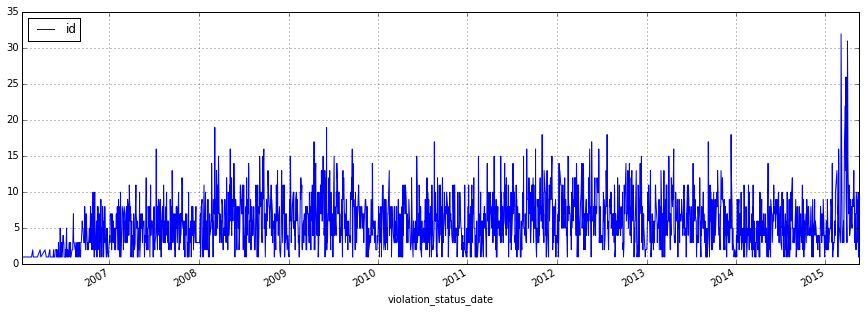

In [19]:
df[['violation_status_date','id']].groupby(['violation_status_date']).count().plot(figsize = [15,5])

In [10]:
grouped = df[['violation_date', 'inspection_category','id']].groupby(['violation_date', 'inspection_category']).count()

In [11]:
grouped

id
violation_date inspection_category    
2006-01-01     PERIODIC             10
2006-01-02     COMPLAINT             1
               PERIODIC             50
2006-01-03     COMPLAINT            15
               PERIODIC              1
2006-01-04     COMPLAINT            32
               PERIODIC              4
2006-01-05     COMPLAINT            18
               PERIODIC              2
2006-01-06     COMPLAINT            19
               PERIODIC              5
2006-01-07     COMPLAINT             1
2006-01-09     COMPLAINT            11
               PERIODIC              7
2006-01-10     COMPLAINT            13
               PERIODIC              3
2006-01-11     COMPLAINT            24
               PERIODIC              2
               PERMIT                1
2006-01-12     COMPLAINT            24
               PERIODIC              2
               PERMIT                1
2006-01-13     COMPLAINT            18
               PERMIT                1
2006-01-14     COMPLAINT             2
2006-01-17     COMPLAINT            18
               PERIODIC              1
2006-01-18     COMPLAINT            27
               PERIODIC              6
2006-01-19     COMPLAINT            32
...                                 ..
2015-05-06     PERMIT                4
2015-05-07     COMPLAINT            17
               PERIODIC              4
               PERMIT                2
2015-05-08     COMPLAINT            10
               PERIODIC              1
               PERMIT                2
2015-05-11     COMPLAINT             8
               PERIODIC              3
               PERMIT                1
2015-05-12     COMPLAINT            11
               PERMIT                4
2015-05-13     COMPLAINT             8
               PERIODIC              4
               PERMIT                1
2015-05-14     COMPLAINT            11
               PERIODIC              4
               PERMIT                2
2015-05-15     COMPLAINT            13
               PERIODIC              2
2015-05-18     COMPLAINT             8
               PERIODIC              4
               PERMIT                2
2015-05-19     COMPLAINT             9
               PERIODIC              2
2015-05-20     COMPLAINT             8
               PERIODIC              1
               PERMIT                1
2015-05-21     COMPLAINT            11
               PERIODIC              1

[5749 rows x 1 columns]

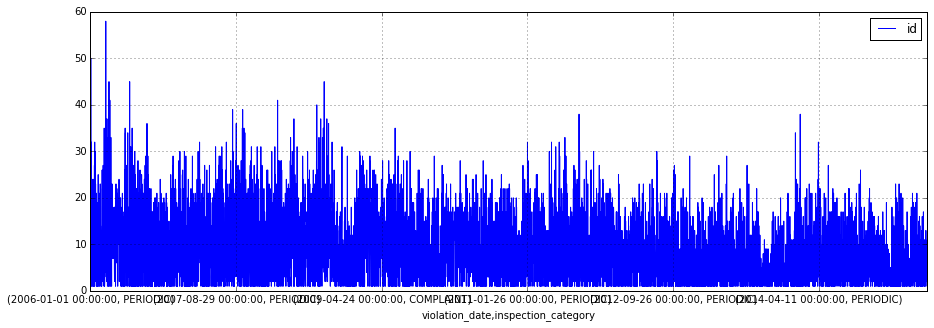

In [20]:
grouped.plot(figsize = [15, 5]) # This is no use! all date-category combinations are plotted in order!

In [44]:
df.dtypes

id                                       int64
violation_last_modified_date    datetime64[ns]
violation_date                  datetime64[ns]
violation_code                          object
violation_status                        object
violation_status_date           datetime64[ns]
violation_description                   object
violation_location                      object
violation_inspector_comments            object
violation_ordinance                     object
inspector_id                            object
inspection_number                        int64
inspection_status                       object
inspection_waived                       object
inspection_category                     object
department_bureau                       object
address                                 object
property_group                           int64
ssa                                     object
latitude                               float64
longitude                              float64
location     

###unstacking (reshaping data)
* taking a hierachical index and shifting one into column names

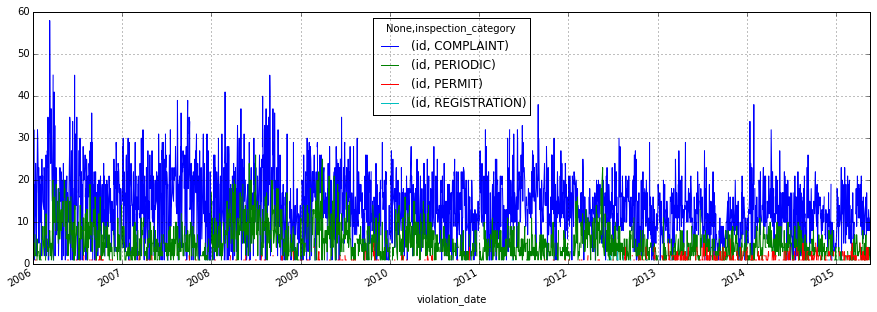

In [23]:
grouped_unstack = grouped.unstack(level = -1)
grouped_unstack.plot(figsize = [15, 5])

####Indexing
* set_index(): set index of a series (such as result of a subsetting on a data frame), as name suggests!
* reindex: take what's an index now and turn it into a column

####Subsetting: e.g. plotting data from last three years

In [24]:
grouped_unstack['2015'] # a datetime variable can be subsetted by specifying the desired time

id                             
inspection_category COMPLAINT PERIODIC PERMIT REGISTRATION
violation_date                                            
2015-01-02                  4        1    NaN          NaN
2015-01-05                 10        1      1          NaN
2015-01-06                 18        1    NaN          NaN
2015-01-07                 16      NaN    NaN          NaN
2015-01-08                  9        1      1          NaN
2015-01-09                 16      NaN    NaN          NaN
2015-01-12                  4        3    NaN          NaN
2015-01-13                 11        4      1          NaN
2015-01-14                 13        1    NaN          NaN
2015-01-15                 14      NaN      3          NaN
2015-01-16                  9      NaN      2          NaN
2015-01-20                 11        1    NaN          NaN
2015-01-21                 13        3      1          NaN
2015-01-22                 16        3    NaN          NaN
2015-01-23                 23        1      2          NaN
2015-01-24                  1      NaN    NaN          NaN
2015-01-26                 16      NaN      1          NaN
2015-01-27                 12      NaN    NaN          NaN
2015-01-28                 20        1      3          NaN
2015-01-29                 12        1      2          NaN
2015-01-30                 19      NaN    NaN          NaN
2015-02-02                  5        1      1          NaN
2015-02-03                  8      NaN      1          NaN
2015-02-04                 17      NaN      3          NaN
2015-02-05                 14        2      1          NaN
2015-02-06                 23      NaN      1          NaN
2015-02-09                  6      NaN    NaN          NaN
2015-02-10                  5        2      2          NaN
2015-02-11                 19        1      2          NaN
2015-02-13                  7      NaN      2          NaN
...                       ...      ...    ...          ...
2015-04-13                  9        4      1          NaN
2015-04-14                 13        2      1          NaN
2015-04-15                 21        1    NaN          NaN
2015-04-16                 12        2      2          NaN
2015-04-17                  7        4      2          NaN
2015-04-19                NaN      NaN      1          NaN
2015-04-20                 11        5      1          NaN
2015-04-21                 15        8      3          NaN
2015-04-22                  6        5      3          NaN
2015-04-23                 16        2      1          NaN
2015-04-24                 14        2      3          NaN
2015-04-27                 11      NaN    NaN          NaN
2015-04-28                  7        1      1          NaN
2015-04-29                 10        1      2          NaN
2015-04-30                 10        5      1          NaN
2015-05-01                 13        1      1          NaN
2015-05-04                 16        7    NaN          NaN
2015-05-05                 12        2      1          NaN
2015-05-06                  7        4      4          NaN
2015-05-07                 17        4      2          NaN
2015-05-08                 10        1      2          NaN
2015-05-11                  8        3      1          NaN
2015-05-12                 11      NaN      4          NaN
2015-05-13                  8        4      1          NaN
2015-05-14                 11        4      2          NaN
2015-05-15                 13        2    NaN          NaN
2015-05-18                  8        4      2          NaN
2015-05-19                  9        2    NaN          NaN
2015-05-20                  8        1      1          NaN
2015-05-21                 11        1    NaN          NaN

[103 rows x 4 columns]

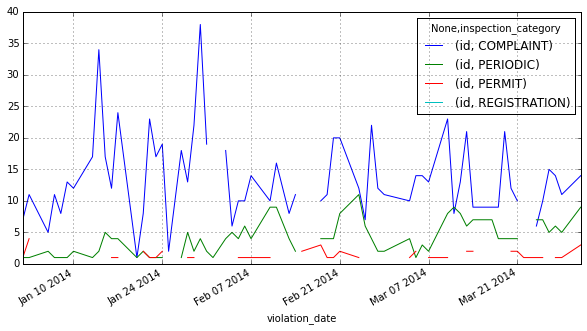

In [27]:
grouped_unstack['2014-01':'2014-03'].plot(figsize = [10, 5]) # can even subset to periods of time like this!

In [28]:
grouped_unstack.dtypes

    inspection_category
id  COMPLAINT              float64
    PERIODIC               float64
    PERMIT                 float64
    REGISTRATION           float64
dtype: object

In [30]:
df1 = df[df["violation_status"] == "OPEN"] # subsetting the entire dataframe to rows with a particular variable value

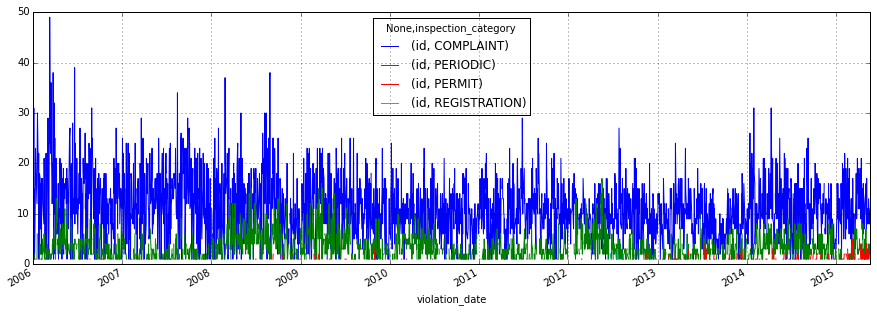

In [32]:
df1[['violation_date', 'inspection_category','id']].groupby(['violation_date', 'inspection_category']).count().unstack(level = -1).plot(figsize = [15, 5])
# plot of all open cases counts over time!

####Melt

In [34]:
pd.melt?
#grouped_open_categ = grouped

##Model Checking - prediction outcome
Our data runs from Jan 1 2006 to 2015. We want to be careful so that cross-validation is done with training data all in the past and test data all in the future. 
For example, 
* leave out the most recent six months. 
* Expanding window: for i in 2007 to 2015, take years 2006 to i as training, and predict on the next six months starting i. This gives multiple model checking practices: M1, M2, ... say M5. These models can be best fit in different ways, and of course we care about the one who takes all history and predicts tomorrow, but they help us so that we don't base our decisions on just one train-test set.
* Decay functions: do we give less weight on data from previous years?
* Seasonality component


Pipeline

####Python packages good for model building and evaluation:
* `scikit-learn`
* `statsmodels`

Look up DataGotham: 
* basic scikit : https://github.com/yhat/DataGotham2013/blob/master/notebooks/4%20-%20scikit-learn%20basics.ipynb
_all code below about iris data all comes from the above notebook_
* fitting and model evaluation: https://github.com/yhat/DataGotham2013/blob/master/notebooks/8%20-%20Fitting%20and%20Evaluating%20Your%20Model.ipynb 



In [5]:
import pandas as pd
import numpy as np
import pylab as pl
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

svm_clf = SVC()
neighbors_clf = KNeighborsClassifier()
clfs = [
    ("svc", SVC()),
    ("KNN", KNeighborsClassifier())
    ]
for name, clf in clfs:
    clf.fit(df[iris.feature_names], df.species)
    print name, clf.predict(iris.data)
    print "*"*80
    
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(df[iris.feature_names], df.species)
clf.predict(df[iris.feature_names])
pd.crosstab(df.species, clf.predict(df[iris.feature_names]))

svc [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
********************************************************************************
KNN [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
********************************************************************************


col_0,0,1,2
species,,,
0,50,0,0
1,0,50,0
2,0,0,50


###Splitting data for training and test
Do it first thing when you have the data for fairness --- and that you often forget (e.g. when you do imputation of missing values). Then within the large training set further splits and do a for loop for different time cutoffs.